In [1]:
import numpy as np
print('numpy: %s' % np.__version__)

import pandas as pd
print('pandas: %s' % pd.__version__)

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
print('sklearn: %s' % sklearn.__version__)

import matplotlib
import matplotlib.pyplot as plt
print('matplotlib: %s' % matplotlib.__version__)

numpy: 1.18.1
pandas: 1.0.1
sklearn: 0.22.1
matplotlib: 3.1.3


In [13]:
# Display all the columns for the dataframes (not-truncated)
pd.set_option("display.max_columns", None)

In [14]:
X = pd.read_csv("Resources/crypto_clean_data.csv")
X

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
1,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
2,X13,PoW/PoS,2.927942e+10,3.141593e+11
3,SHA-256,PoW,1.792718e+07,2.100000e+07
4,Ethash,PoW,1.076842e+08,0.000000e+00
...,...,...,...,...
527,SHA-256,DPoS,2.000000e+09,2.000000e+09
528,Scrypt,PoW/PoS,1.493105e+07,2.500000e+08
529,CryptoNight,PoW,9.802226e+08,1.400223e+09
530,Equihash,PoW,7.296538e+06,2.100000e+07


In [15]:
# Split the columns into quantitative and categorical
all_quantitative_columns = set(X.describe().columns)
all_categorical_columns = set(X.columns) - all_quantitative_columns
print("quantitative columns\n\t" + "\n\t".join(all_quantitative_columns))
print()
print("categorical columns\n\t" + "\n\t".join(all_categorical_columns))


quantitative columns
	TotalCoinsMined
	TotalCoinSupply

categorical columns
	Algorithm
	ProofType


In [16]:
# convert the categorical features into numerical data
X = pd.get_dummies(X, columns=all_categorical_columns)
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,Algorithm_CryptoNight,Algorithm_CryptoNight Heavy,Algorithm_CryptoNight-V7,Algorithm_Cryptonight-GPU,Algorithm_DPoS,Algorithm_Dagger,Algorithm_Dagger-Hashimoto,Algorithm_ECC 256K1,Algorithm_Equihash,Algorithm_Equihash+Scrypt,Algorithm_Ethash,Algorithm_Exosis,Algorithm_Green Protocol,Algorithm_Groestl,Algorithm_HMQ1725,Algorithm_HybridScryptHash256,Algorithm_IMesh,Algorithm_Jump Consistent Hash,Algorithm_Keccak,Algorithm_Leased POS,Algorithm_Lyra2RE,Algorithm_Lyra2REv2,Algorithm_Lyra2Z,Algorithm_M7 POW,Algorithm_Multiple,Algorithm_NIST5,Algorithm_NeoScrypt,Algorithm_Ouroboros,Algorithm_PHI1612,Algorithm_POS 2.0,Algorithm_POS 3.0,Algorithm_PoS,Algorithm_Proof-of-Authority,Algorithm_Proof-of-BibleHash,Algorithm_QUAIT,Algorithm_QuBit,Algorithm_Quark,Algorithm_SHA-256,Algorithm_SHA-256 + Hive,Algorithm_SHA-256D,Algorithm_SHA-512,Algorithm_SHA3,Algorithm_Scrypt,Algorithm_Semux BFT consensus,Algorithm_Shabal256,Algorithm_Skein,Algorithm_SkunkHash,Algorithm_SkunkHash v2 Raptor,Algorithm_Stanford Folding,Algorithm_TRC10,Algorithm_Time Travel,Algorithm_Tribus,Algorithm_VBFT,Algorithm_VeChainThor Authority,Algorithm_X11,Algorithm_X11GOST,Algorithm_X13,Algorithm_X14,Algorithm_X15,Algorithm_X16R,Algorithm_XEVAN,ProofType_DPOS,ProofType_DPoS,ProofType_HPoW,ProofType_LPoS,ProofType_POBh,ProofType_PoA,ProofType_PoC,ProofType_PoS,ProofType_PoS/LPoS,ProofType_PoS/PoW,ProofType_PoS/PoW/PoT,ProofType_PoST,ProofType_PoW,ProofType_PoW + Hive,ProofType_PoW and PoS,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
528,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
529,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

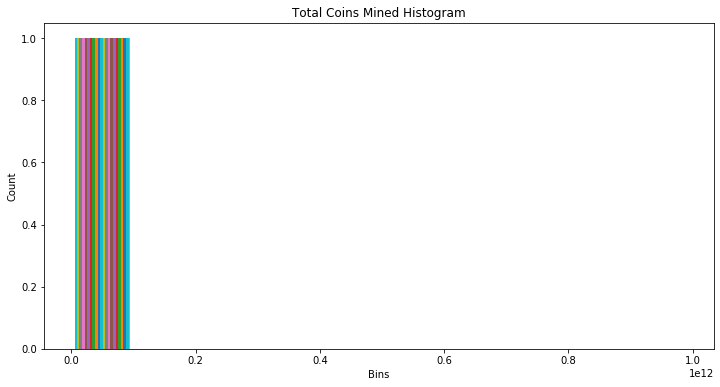

In [20]:
# Display histogram to see spread of total coins mined
plt.figure(figsize=(12, 6))
plt.hist(
    x=X[["TotalCoinsMined"]],
    bins=10,
    rwidth=0.9
)
plt.title('Total Coins Mined Histogram')
plt.xlabel('Bins')
plt.ylabel('Count')
plt.show()

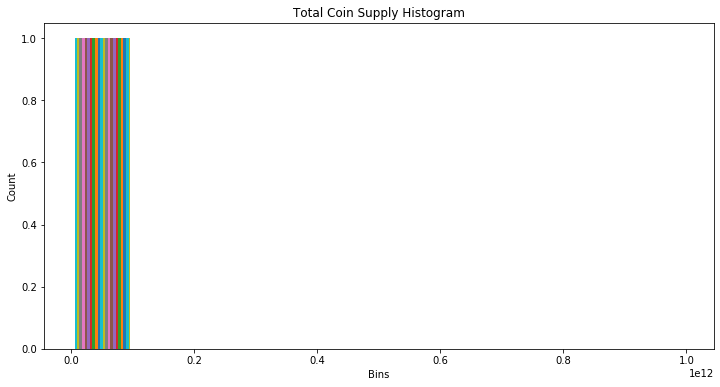

In [19]:
# Display histogram to see spread of total coin supply
plt.figure(figsize=(12, 6))
plt.hist(
    x=X[["TotalCoinSupply"]],
    bins=10,
    rwidth=0.9
)
plt.title('Total Coin Supply Histogram')
plt.xlabel('Bins')
plt.ylabel('Count')
plt.show()

In [21]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(532, 98)

In [22]:
# Reduce the dimensions with Principal Component Analysis (pca)
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
pca = PCA(n_components = 0.90)
principal_components = pca.fit_transform(X_scaled)

print("Data shape:\t", X_scaled.shape)
print("PAC shape:\t", principal_components.shape)

Data shape:	 (532, 98)
PAC shape:	 (532, 74)


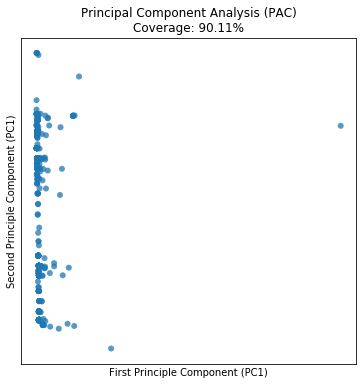

In [23]:
plt.figure(figsize=(6, 6))
plt.scatter(
    x = principal_components[:,0],
    y = principal_components[:,1],
    alpha = 0.75,
    edgecolors="none",
)
plt.title("Principal Component Analysis (PAC)\n" + 
          f"Coverage: {round(100 * sum(pca.explained_variance_ratio_), 2)}%")
plt.xlabel('First Principle Component (PC1)')
plt.ylabel('Second Principle Component (PC1)')
plt.xticks([])
plt.yticks([])
plt.show()

In [24]:
# Reduce the dataset for t-distributed Stochastic Neighbor Embedding (t-SNE)
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
tsne = TSNE()
tsne_features = tsne.fit_transform(principal_components)
print("Data shape:\t", principal_components.shape)
print("t-SNE shape:\t", tsne_features.shape)

Data shape:	 (532, 74)
t-SNE shape:	 (532, 2)


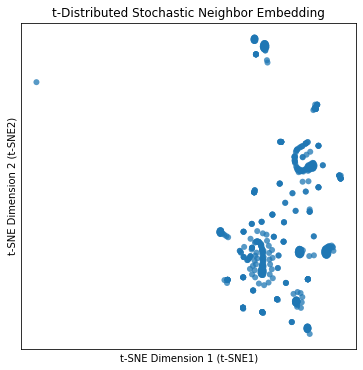

In [25]:
# Plot the t-Distributed Stochastic Neighbor Embedding
plt.figure(figsize=(6, 6))
plt.scatter(
    x = tsne_features[:,0], 
    y = tsne_features[:,1],
    alpha = 0.75,
    edgecolors="none"
)
plt.title("t-Distributed Stochastic Neighbor Embedding")
plt.xlabel('t-SNE Dimension 1 (t-SNE1)')
plt.ylabel('t-SNE Dimension 2 (t-SNE2)')
plt.xticks([])
plt.yticks([])
plt.show()

In [26]:
# determine the optimal number of clusters for k-means clustering
# https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
# https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
# https://machinelearninginterview.com/topics/machine-learning/how-to-find-the-optimal-number-of-clusters-in-k-means-elbow-and-silhouette-methods/
def kmeans_optimal_clusters(data, clusters):
    k_range = range(1, clusters)
    inertia = []
    for k in k_range:
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    return k_range, inertia

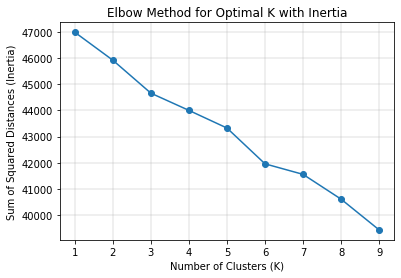

In [27]:
k, inertia = kmeans_optimal_clusters(principal_components, 10)
# Plot the Elbow plot for Inertia
plt.plot(k, inertia, 'o-')
plt.title('Elbow Method for Optimal K with Inertia')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.grid(linewidth = 0.4)
plt.show()